# Simulate shocks to Mark0 ABM

## Imports

In [1]:
import os
# if using CMake, uncomment the following line:
os.chdir('build/')
from notebook_utils import *
import matplotlib.pyplot as plt
%matplotlib inline 

%load_ext autoreload
%autoreload 2

## Preparing the simulation


To prepare the simulation, we create two lists: `param_names` and `param_values`. These contain, respectively, the named parameters and their values that are passed to the `markovid` program. 

The following shocks are implemented:

1. `--shockflag=0`: No shock (default)
2. `--shockflag=1`: Pure Consumption shock 
3. `--shockflag=2`: Consumption + Production shock
4. `--shockflag=3`: Consumption Shock + Naive Debt policy
5. `--shockflag=4`: Consumption Shock + Production Shock + Naive Debt policy

### Basic example 

Suppose we want to generate the V-shaped recovery from Fig1 of the paper. The parameters are:

1. `shockflag=2` : for a combined consumption and production shock.
2. `cfactor=0.7`: $\Delta c/ c = 0.3$ corresponds to `1-cfactor`. 
3. `zfactor=0.9`: $\Delta \zeta / \zeta = 0.1$ corresponds to `1-zfactor`
4. `t_start=2000`: All of our shocks start at `t=2000` in simulation time. 
5. `t_end=2006`: The shock lasts for six months. 


Once the two lists `param_names` and `param_values` are prepared, we can run the program by calling `run_program_default`. 

To read the generated output, we use `read_output` which takes `shockflag` as its sole argument. 

Finally to plot the evolution after the shock, we call `plot_evolution`

In [2]:
shockflag=2
param_names = ['shockflag','cfactor','zfactor','t_start',  't_end']
param_values = [shockflag,  0.7, 0.9,2000, 2006,]

In [3]:
out = run_program_default(param_names, param_values,)


Running program
./markovid --shockflag=2  --cfactor=0.7  --zfactor=0.9  --t_start=2000  --t_end=2006 


In [4]:
result = read_output(shockflag)


The duration of the shock is marked in grey. 

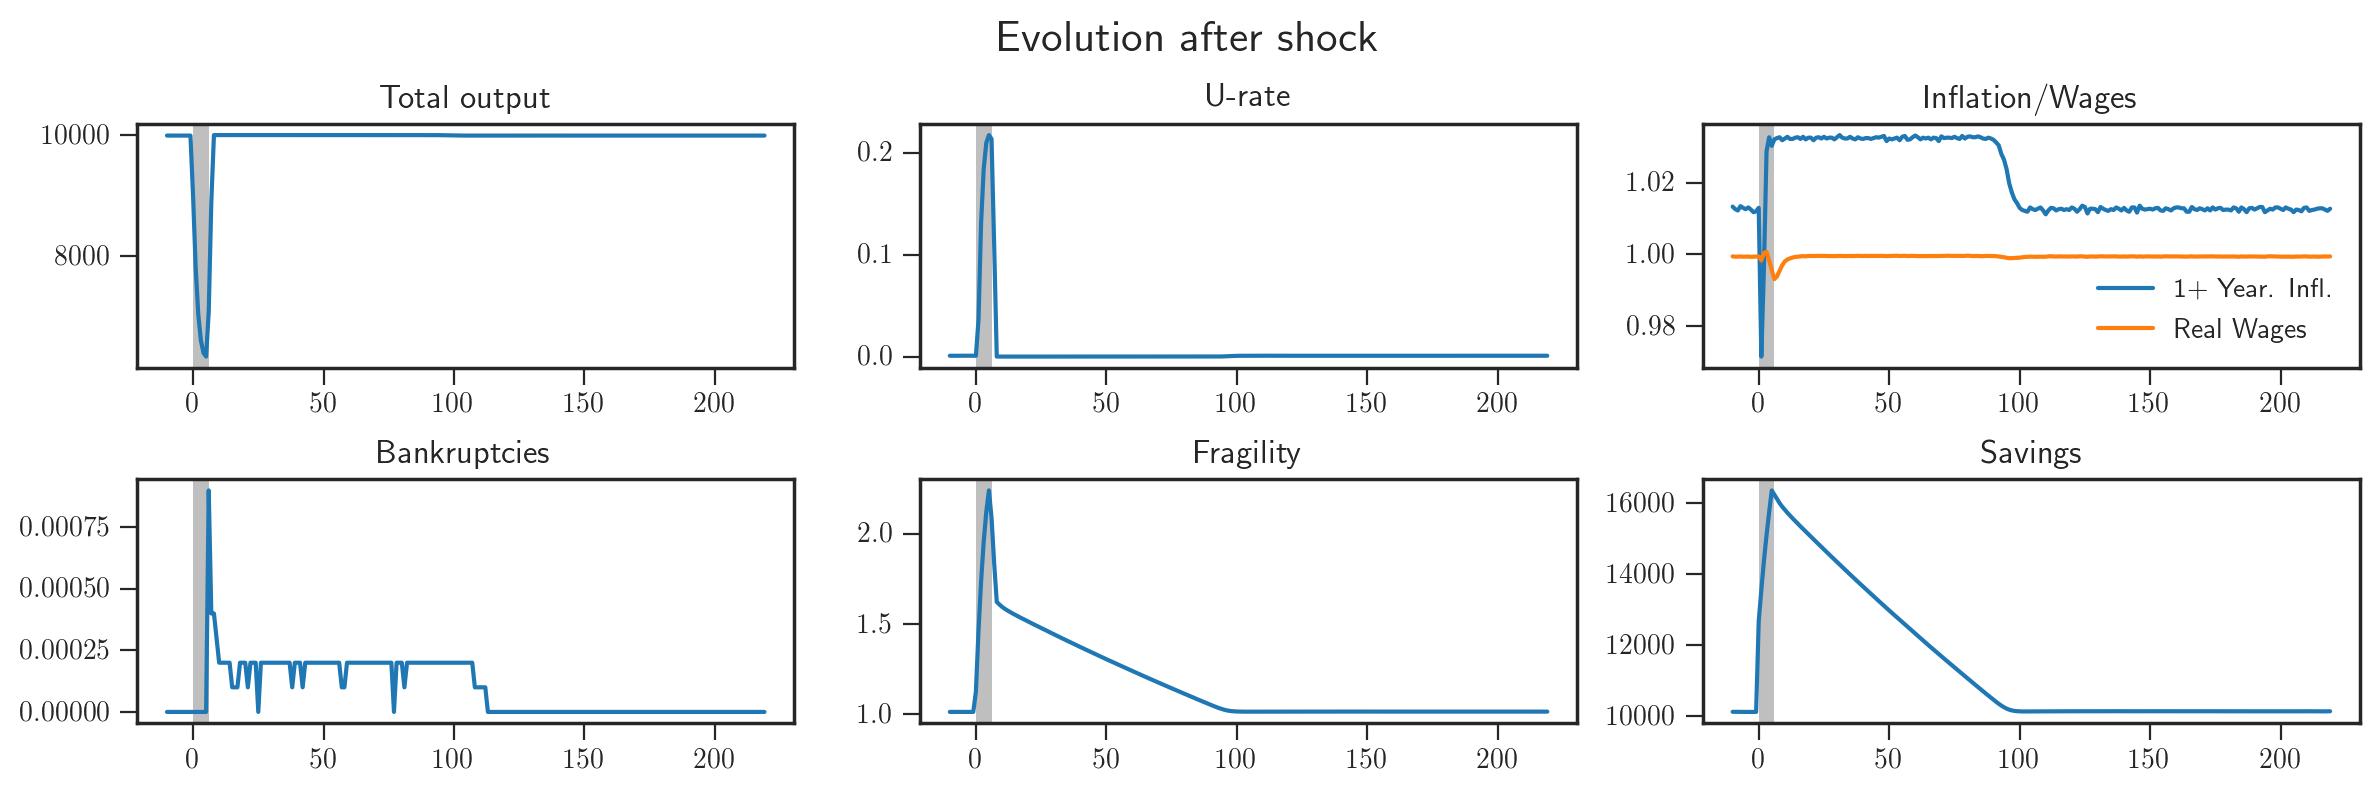

In [5]:
plot_evolution(result, t_start=2000, t_end=2006, plot_end = 2220)

### Example with adaptive policy

To reproduce the results from the paper with adaptive policy (Fig 5, 4th column), we have the following parameters:

1. `shockflag=4` : for a combined consumption and production shock with a debt policy.
2. `cfactor=0.7`: $\Delta c/ c = 0.3$ corresponds to `1-cfactor`. 
3. `zfactor=0.5`: $\Delta \zeta / \zeta = 0.5$ corresponds to `1-zfactor`
4. `t_start=2000`: All of our shocks start at `t=2000` in simulation time. 
5. `t_end=2009`: The shock lasts for nine months.
6. `policy_start=2000`: The debt policy begins the same time as the shock 
7. `policy_end=2009`: The debt policy ends with the shock. 
8. `adapt=1`: The adaptive policy is active. 

We prepare the simulation by creating `param_names` and `param_values` as follows:


In [20]:
shockflag=4
param_names = ['shockflag', 'cfactor', 'zfactor', 't_start', 't_end', 'policy_start', 'policy_end', 'adapt', 'seed']
param_values = [shockflag, 0.7, 0.5, 2000, 2009, 2000, 2009, 1, 0]

In [21]:
out = run_program_default(param_names, param_values,)

Running program
./markovid --shockflag=4  --cfactor=0.7  --zfactor=0.5  --t_start=2000  --t_end=2009  --policy_start=2000  --policy_end=2009  --adapt=1  --seed=0 


In [22]:
result = read_output(shockflag)

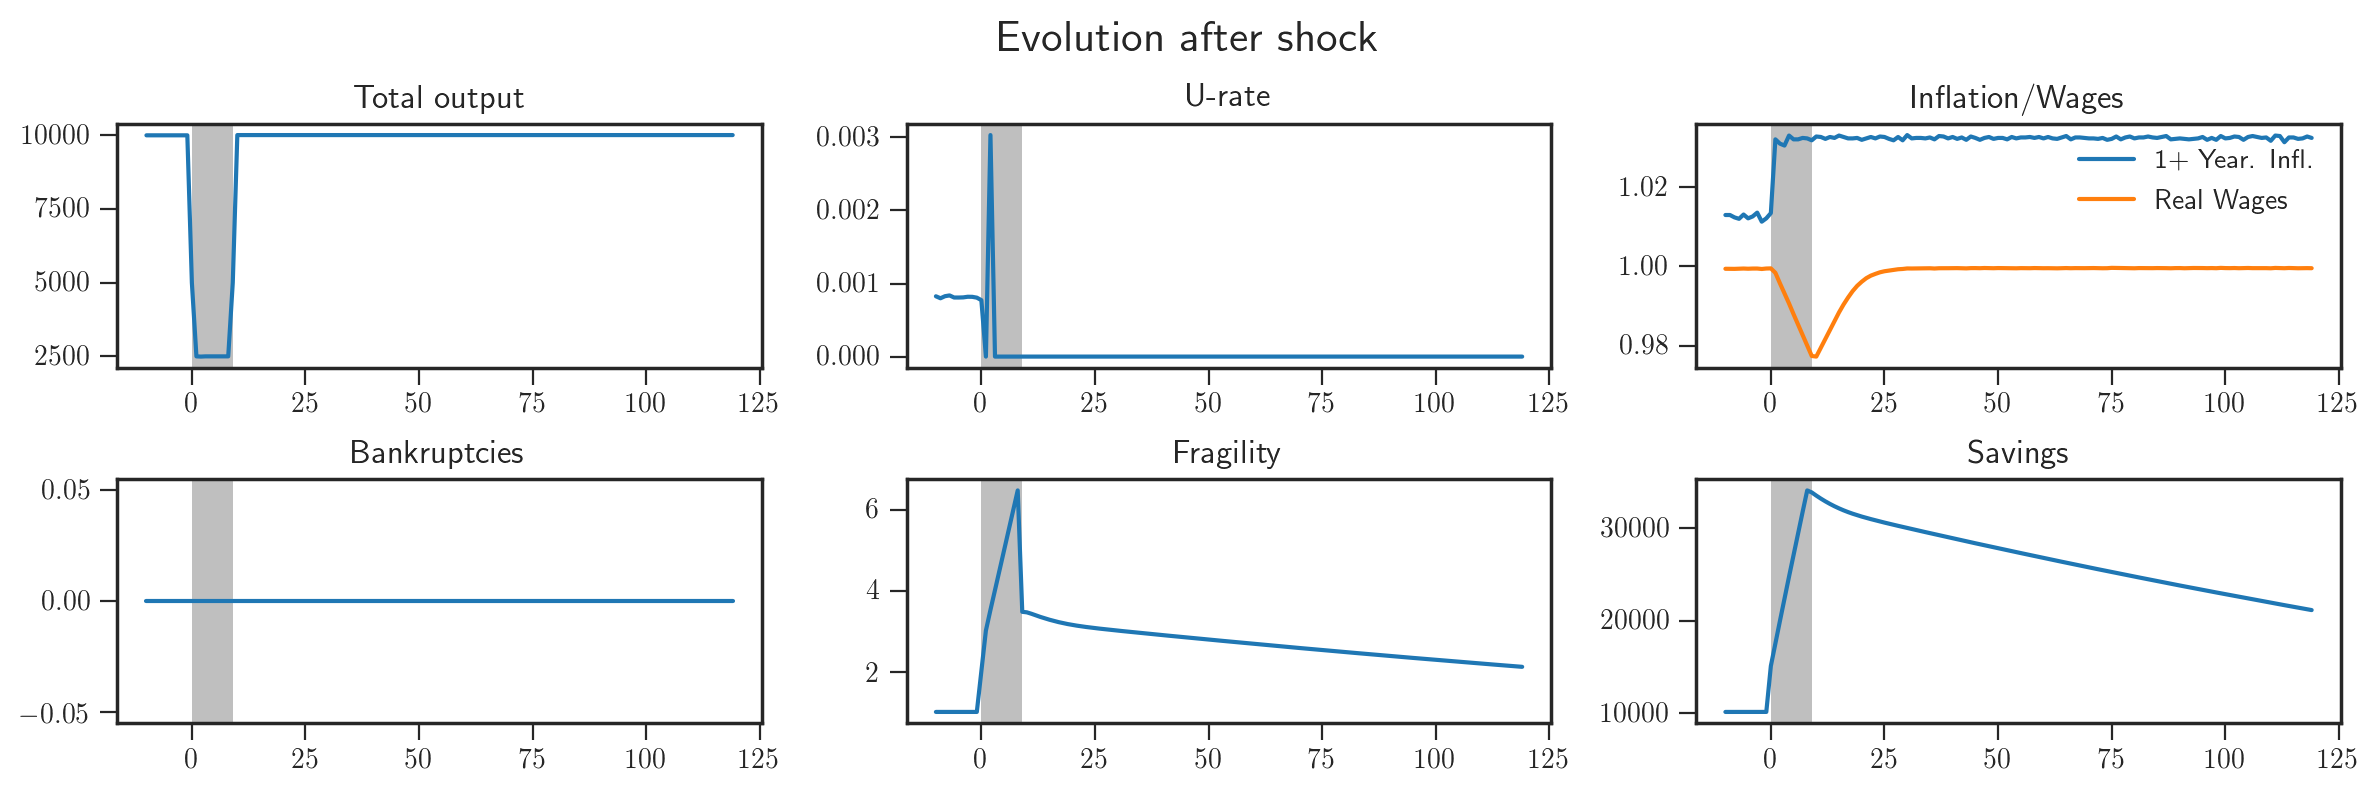

In [23]:
plot_evolution(result, t_start=2000, t_end=2009, plot_end = 2120, is_shade=True)

To check the duration for the adaptive policy, we do:

In [24]:
 print(result['true_end'].iloc[-1])

2090


So we see that the adaptive policy ran for 91 steps after the start of the shock.

Other parameters and their names can be found in the README to the code. 

In [ ]:
shockflag=2
param_names = ['shockflag','cfactor','zfactor','t_start',  't_end']
param_values = [shockflag,  0.7, 0.9,2000, 2006,] 